<a href="https://colab.research.google.com/github/brendonb/Data-analysis/blob/main/search_query_intent_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files
uploaded = files.upload()


## Problem Statement
Classifying user's search intent online when using search engines.


In [5]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Get the filename from the uploaded dictionary
df = pd.read_csv('search_query_intents.csv')





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            100 non-null    int64 
 1   Query         100 non-null    object
 2   Country       100 non-null    object
 3   SearchEngine  100 non-null    object
 4   Device        100 non-null    object
 5   Category      100 non-null    object
 6   Impressions   100 non-null    int64 
 7   Clicks        100 non-null    int64 
 8   TimeStamp     100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB



# Data Validation


In [7]:
# check types and also missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            100 non-null    int64 
 1   Query         100 non-null    object
 2   Country       100 non-null    object
 3   SearchEngine  100 non-null    object
 4   Device        100 non-null    object
 5   Category      100 non-null    object
 6   Impressions   100 non-null    int64 
 7   Clicks        100 non-null    int64 
 8   TimeStamp     100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


,0
ID,0
Query,0
Country,0
SearchEngine,0
Device,0
Category,0
Impressions,0
Clicks,0
TimeStamp,0


# Clean dataset


In [11]:
# convert the timestamp info
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# check numeric fields
df['Clicks'] =pd.to_numeric(df['Clicks'], errors='coerce')
df['Impressions'] =pd.to_numeric(df['Impressions'], errors='coerce')

# create Click-Through Rate column
df['CTR'] = df['Clicks'] / df['Impressions']


# Feature Engineering

In [28]:
# Time component extraction
df['Day'] = df['TimeStamp'].dt.day
df['Month'] = df['TimeStamp'].dt.month
df['Year'] = df['TimeStamp'].dt.year
df['Hour'] = df['TimeStamp'].dt.hour

# Assign the correct categories

def assign_category(query):
    query = query.lower()
    if any(word in query for word in ['lose weight', 'fitness', 'diet', 'gym','covid']):
        return 'Health'
    elif any(word in query for word in ['learn', 'python', 'course', 'study','news']):
        return 'Education'
    elif any(word in query for word in ['linux', 'windows', 'ios' 'android','ip address']):
        return 'Technology'
    elif any(word in query for word in ['travel', 'flight', 'hotels', 'visa']):
        return 'Travel'
    elif any(word in query for word in ['money', 'credit card', 'loan','lotto']):
        return 'Finance'
    elif any(word in query for word in ['games', 'sport', 'movies']):
        return 'Entertainment'
    elif any(word in query for word in ['accomadation', 'rent', 'buy']):
        return 'Accomadation'
    else:
        return 'Other'

df['Category'] = df['Query'].apply(assign_category)



# Exploratory Analysis


In [15]:
df.describe()
df['Country'].value_counts()
df['Device'].value_counts()
df['SearchEngine'].value_counts()

,count
SearchEngine,
Ask.com,23
Yahoo,21
Bing,20
DuckDuckGo,18
Google,17
Brave Search,1


CTR by Category


In [39]:
df.groupby('Category')['CTR'].mean().sort_values(ascending=False)


,CTR
Category,
Accomadation,0.638117
Travel,0.566210
Health,0.562176
Education,0.557875
Entertainment,0.453117
Other,0.442411
Technology,0.399867
Finance,0.321980


Search Over Time


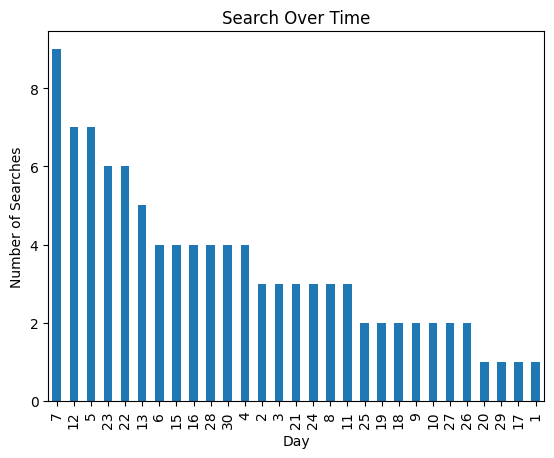

In [20]:
df['Day'].value_counts().plot(kind='bar', title='Search Over Time')
plt.ylabel('Number of Searches')
plt.xlabel('Day')
plt.show()

Top Countries


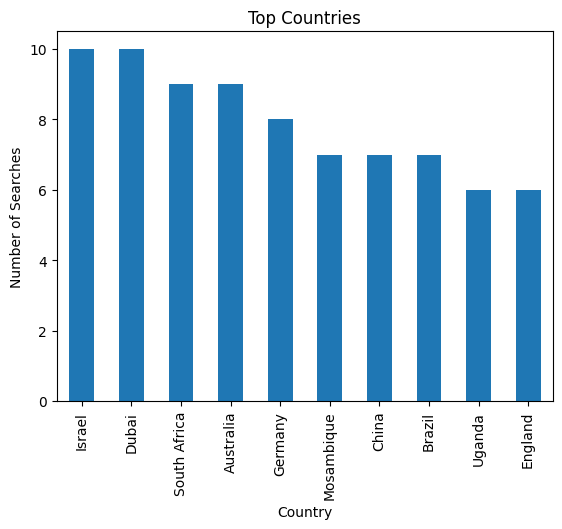

In [19]:
import matplotlib.pyplot as plt
df['Country'].value_counts().head(10).plot(kind='bar', title='Top Countries')
plt.ylabel('Number of Searches')
plt.xlabel('Country')
plt.show()

Popular Searches

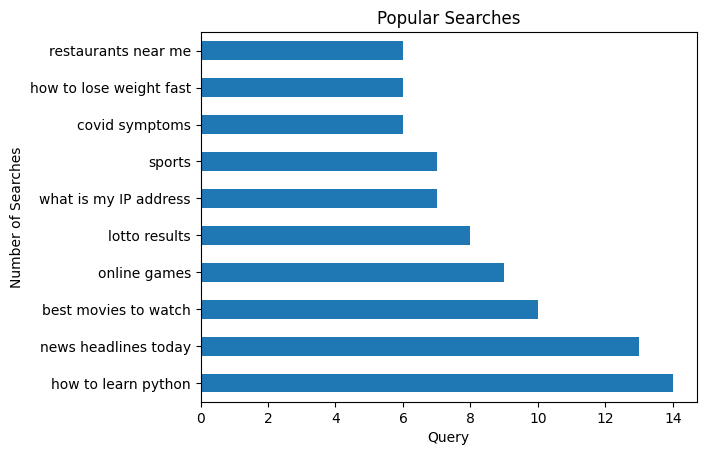

In [30]:
df['Query'].value_counts().head(10).plot(kind='barh', title='Popular Searches')
plt.ylabel('Number of Searches')
plt.xlabel('Query')
plt.show()

Country by Category searches

In [36]:
# Group by Country and Category, then count the number of queries (searches)
category_country_counts = df.groupby(['Category', 'Country'])['Query'].count().reset_index()

# Rename the count column for clarity
category_country_counts.rename(columns={'Query': 'SearchCount'}, inplace=True)

# Sort within each category and get the top 3 countries per category
top5_countries_per_category = (
    category_country_counts
    .sort_values(['Category', 'SearchCount'], ascending=[True, False])
    .groupby('Category')
    .head(3)
)

# Display
print(top5_countries_per_category)


         Category        Country  SearchCount
0    Accomadation      Argentina            1
1    Accomadation         Brazil            1
2    Accomadation          China            1
14      Education          India            3
15      Education         Israel            3
16      Education     Mosambique            3
21  Entertainment      Australia            5
24  Entertainment          Dubai            3
28  Entertainment         Israel            3
33        Finance          China            2
34        Finance          Dubai            2
37        Finance         Israel            2
44         Health        Germany            2
45         Health          India            2
39         Health         Brazil            1
56          Other   South Africa            2
57          Other  United States            2
49          Other      Australia            1
58     Technology      Australia            2
59     Technology         Brazil            1
60     Technology          China  

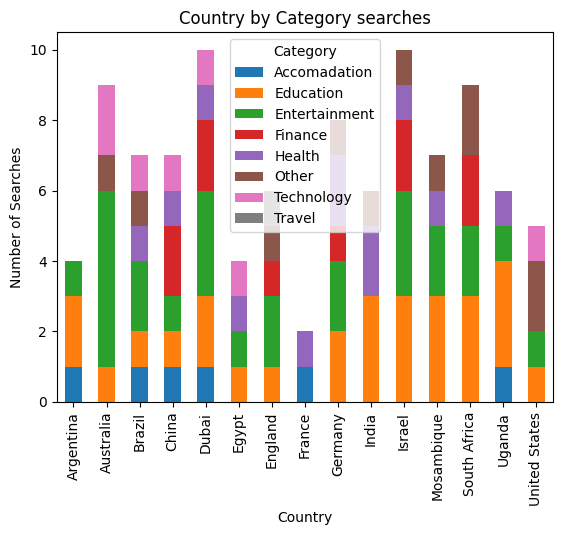

In [33]:
df.groupby(['Country', 'Category']).size().unstack().plot(kind='bar', stacked=True, title='Country by Category searches')
plt.ylabel('Number of Searches')
plt.xlabel('Country')
plt.show()

CTR and Devices

Text(0.5, 1.0, 'CTR Distribution')

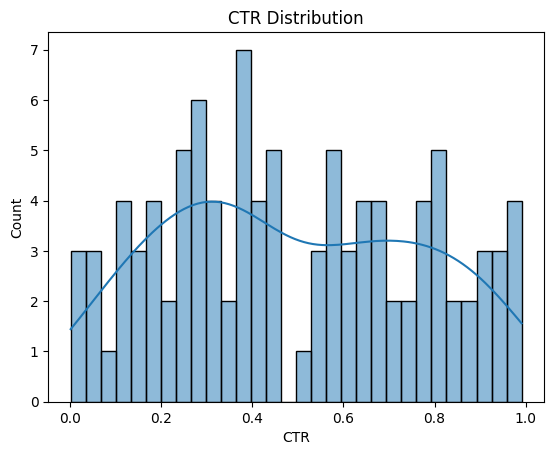

In [38]:
import seaborn as sns
sns.histplot(df['CTR'],bins=30,kde=True)
plt.title('CTR Distribution')
